##### Utilisation des images de jours pour  classifier les intensités lumineuses nocturnes (nightlights_100m) dans leurs catégories respectives

###### Attribution de classe (catégories) aux intensités lumineuses nocturnes

In [1]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import numpy as np

# Chargement des données
file_path = 'E:/Poverty_Predict/Data/DataCIV2.csv'
data = pd.read_csv(file_path)

# Sélection de la colonne pour l'application du GMM
column_to_cluster = "nightlights_100m"
X = data[column_to_cluster].values.reshape(-1, 1)  # Redimensionnement pour le GMM

# Application du GMM pour trouver le nombre optimal de clusters
n_components_range = range(1, 25)  # 24 composants
bics = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X)
    bics.append(gmm.bic(X))
optimal_n_components = n_components_range[np.argmin(bics)]
gmm_optimal = GaussianMixture(n_components=optimal_n_components, random_state=42)
gmm_optimal.fit(X)

# Attribution des labels de cluster à chaque observation
cluster_labels = gmm_optimal.predict(X)

# Exclusion des colonnes spécifiques et création d'un sous-ensemble de DataFrame
columns_to_exclude = [
    "nightlights_50m", "nightlights_20m",
    "nightlights_25m", "nightlights_30m", "nightlights_150m", 
    "nightlights_1000m", "nightlights_5000m","nightlights_0m"
]
df_nightlights_100m = data.drop(columns=columns_to_exclude)

# Ajout de la colonne 'cluster_label' indiquant l'appartenance de chaque observation à un cluster spécifique
df_nightlights_100m['nightlights_100m_bins'] = cluster_labels

# Affichage des résultats
print(f"Nombre optimal de clusters pour 'nightlights_100m': {optimal_n_components}")
print(df_nightlights_100m.head())


Nombre optimal de clusters pour 'nightlights_100m': 21
  country  year   hhid  grappe  menage  vague      zae              region  \
0     CIV  2018  101.0       1       1      1  ABIDJAN  AUTONOME D'ABIDJAN   
1     CIV  2018  102.0       1       2      1  ABIDJAN  AUTONOME D'ABIDJAN   
2     CIV  2018  103.0       1       3      1  ABIDJAN  AUTONOME D'ABIDJAN   
3     CIV  2018  104.0       1       4      1  ABIDJAN  AUTONOME D'ABIDJAN   
4     CIV  2018  105.0       1       5      1  ABIDJAN  AUTONOME D'ABIDJAN   

   milieu         milieu2  ...                     interview__id  \
0  Urbain  Abidjan urbain  ...  2eb3d29ba9814aa9bf99d6908559e7d2   
1  Urbain  Abidjan urbain  ...  99990d719d6243a38fad96a4d7477742   
2  Urbain  Abidjan urbain  ...  6cf633ef989c4a6a93ec483de1fd8193   
3  Urbain  Abidjan urbain  ...  67feab4e35d141679ec4b867a59cba19   
4  Urbain  Abidjan urbain  ...  dc1f1fa87d8e433e8891a4e55a8baca0   

   GPS__Latitude  GPS__Longitude  GPS__Accuracy GPS__Altitude  \
0 

###### representons la distribution de nightlights_100

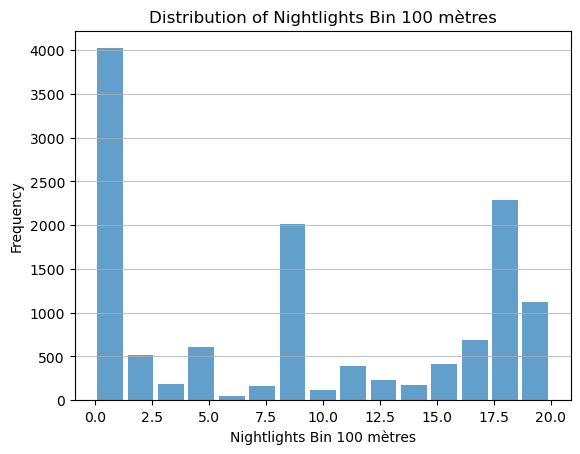

In [2]:
import matplotlib.pyplot as plt

# Assuming df_download is your DataFrame and it has a column named "nightlights_bin"
plt.hist(df_nightlights_100m['nightlights_100m_bins'], bins='auto', alpha=0.7, rwidth=0.85)

plt.xlabel('Nightlights Bin 100 mètres')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.title('Distribution of Nightlights Bin 100 mètres')  # Title of the histogram

plt.grid(axis='y', alpha=0.75)
plt.show()


##### Sauvegardons le dataframe 'nightlights_100' en fichier csv

In [3]:
# Définir le chemin du fichier de sortie
output_file_path = 'E:\\Poverty_Predict\\Data\\df_nightlights_100m.csv'
                    
# Exporter df_nightlights_100m en fichier CSV
df_nightlights_100m.to_csv(output_file_path, index=False)


In [4]:
df_nightlights_100m

country  year      hhid  grappe  menage  vague      zae  \
0         CIV  2018     101.0       1       1      1  ABIDJAN   
1         CIV  2018     102.0       1       2      1  ABIDJAN   
2         CIV  2018     103.0       1       3      1  ABIDJAN   
3         CIV  2018     104.0       1       4      1  ABIDJAN   
4         CIV  2018     105.0       1       5      1  ABIDJAN   
...       ...   ...       ...     ...     ...    ...      ...   
12975     CIV  2019  108408.0    1084       8      2   CENTRE   
12976     CIV  2019  108409.0    1084       9      2   CENTRE   
12977     CIV  2019  108410.0    1084      10      2   CENTRE   
12978     CIV  2019  108411.0    1084      11      2   CENTRE   
12979     CIV  2019  108412.0    1084      12      2   CENTRE   

                   region  milieu         milieu2  ...  \
0      AUTONOME D'ABIDJAN  Urbain  Abidjan urbain  ...   
1      AUTONOME D'ABIDJAN  Urbain  Abidjan urbain  ...   
2      AUTONOME D'ABIDJAN  Urbain  Abidjan urbain  ...   
3      AUTONOME D'ABIDJAN  Urbain  Abidjan urbain  ...   
4      AUTONOME D'ABIDJAN  Urbain  Abidjan urbain  ...   
...                   ...     ...             ...  ...   
12975             MORONOU   Rural           Rural  ...   
12976             MORONOU   Rural           Rural  ...   
12977             MORONOU   Rural           Rural  ...   
12978             MORONOU   Rural           Rural  ...   
12979             MORONOU   Rural           Rural  ...   

                          interview__id  GPS__Latitude  GPS__Longitude  \
0      2eb3d29ba9814aa9bf99d6908559e7d2       5.340541       -4.026030   
1      99990d719d6243a38fad96a4d7477742       5.340402       -4.025834   
2      6cf633ef989c4a6a93ec483de1fd8193       5.340151       -4.025953   
3      67feab4e35d141679ec4b867a59cba19       5.340500       -4.026202   
4      dc1f1fa87d8e433e8891a4e55a8baca0       5.339820       -4.025066   
...                                 ...            ...             ...   
12975  103cff29baaf4405863e1043897aa6dc       6.546733       -4.508211   
12976  e3a3deb8965e45c18018d1e5d103d914       6.549112       -4.505840   
12977  45397589c6d44a478051e4089a884c97       6.551556       -4.507530   
12978  505343592b0f4b8b8ede9980f714b8ab       6.552345       -4.507551   
12979  d3431cc126bd44b38fa4976fc3adb753       6.550105       -4.508566   

       GPS__Accuracy GPS__Altitude       GPS__Timestamp nom_prenom_cm  \
0               46.0          39.0  2018-10-29T17:56:23           NaN   
1               47.0          28.0  2018-10-29T17:54:35           NaN   
2               35.0          68.0  2018-10-29T17:51:50           NaN   
3               32.0          59.0  2018-10-29T19:48:39           NaN   
4               49.0          72.0  2018-10-29T18:45:09           NaN   
...              ...           ...                  ...           ...   
12975            7.0         134.0  2019-06-16T19:42:05           NaN   
12976           36.0         131.0  2019-06-17T08:10:57           NaN   
12977           29.0         118.0  2019-06-16T09:30:14           NaN   
12978           19.0         157.0  2019-06-16T10:18:13           NaN   
12979            6.0         134.0  2019-06-16T08:39:10           NaN   

      localisation_menage nightlights_100m nightlights_100m_bins  
0                     NaN        31.460636                     3  
1                     NaN        31.460636                     3  
2                     NaN        31.460636                     3  
3                     NaN        31.460636                     3  
4                     NaN        33.824036                    10  
...                   ...              ...                   ...  
12975                 NaN         2.226889                    19  
12976                 NaN         1.353545                     9  
12977                 NaN         1.651123                     9  
12978                 NaN         1.111005                    18  
12979                 NaN

##### Création d'une dataframe qui contient les valeurs de nightlights_100m, les classes de nightlights, le pcexp et les coordonnées GPS

In [5]:
import os
import pandas as pd

# Étape 1: Lire le fichier CSV
csv_file_path = 'E:/Poverty_Predict/Data/df_nightlights_100m.csv'
df_nightlights_100m = pd.read_csv(csv_file_path)

# Étape 2: Extraire les informations des images 
images_folder_path = 'C:/Users/d/Desktop/Programme du projet sur CNN pauvreté3/Data/Image_Nombre_25_images_code_4'
images_folder_path = 'F:/Poverty_Predict/Processed_Data_400/Image_decoupe_famille_quarts/Image_Nombre_25_images_code_4'
image_info = []

for image_file in os.listdir(images_folder_path):
    # Extrait le nom de base de l'image avec extension .png
    base_name, _ = os.path.splitext(image_file)
    base_name_with_extension = base_name + '.png'  # Ajoute l'extension .png
    parts = base_name.split('_')
    if len(parts) >= 3:
        menage_lat, menage_lon = float(parts[0]), float(parts[1])
        image_info.append({
            'image_name': base_name_with_extension,  # Utilise le nom avec extension
            'menage_lat': menage_lat,
            'menage_lon': menage_lon
        })

df_images = pd.DataFrame(image_info)

# Étape 3: Fusionner les DataFrames
# Convertir les latitudes et longitudes pour la fusion
df_nightlights_100m['GPS__Latitude'] = df_nightlights_100m['GPS__Latitude'].astype(float)
df_nightlights_100m['GPS__Longitude'] = df_nightlights_100m['GPS__Longitude'].astype(float)

df_download_100m = pd.merge(df_images, df_nightlights_100m, 
                            left_on=['menage_lat', 'menage_lon'], 
                            right_on=['GPS__Latitude', 'GPS__Longitude'],how='inner')

# Sélection et renommage des colonnes pour le résultat final
df_download_100m = df_download_100m.rename(columns={
    'pcexp': 'pcexp',
    'nightlights_100m': 'nightlights_100m',
    'nightlights_100m_bins': 'nightlights_100m_bins'
})

df_download_100m = df_download_100m[['image_name', 'menage_lat', 'menage_lon', 'pcexp', 'nightlights_100m', 'nightlights_100m_bins']]



In [6]:
# Étape 6: Afficher les valeurs du DataFrame
print(df_download_100m.head())


                     image_name  menage_lat  menage_lon      pcexp  \
0   10.0003794_-5.5802424_1.png   10.000379   -5.580242  274696.28   
1  10.0003794_-5.5802424_10.png   10.000379   -5.580242  274696.28   
2  10.0003794_-5.5802424_11.png   10.000379   -5.580242  274696.28   
3  10.0003794_-5.5802424_12.png   10.000379   -5.580242  274696.28   
4  10.0003794_-5.5802424_13.png   10.000379   -5.580242  274696.28   

   nightlights_100m  nightlights_100m_bins  
0          2.232362                     19  
1          2.232362                     19  
2          2.232362                     19  
3          2.232362                     19  
4          2.232362                     19  


In [7]:
df_download_100m.shape

(324500, 6)

In [8]:
df_download_100m

image_name  menage_lat  menage_lon       pcexp  \
0        10.0003794_-5.5802424_1.png   10.000379   -5.580242   274696.28   
1       10.0003794_-5.5802424_10.png   10.000379   -5.580242   274696.28   
2       10.0003794_-5.5802424_11.png   10.000379   -5.580242   274696.28   
3       10.0003794_-5.5802424_12.png   10.000379   -5.580242   274696.28   
4       10.0003794_-5.5802424_13.png   10.000379   -5.580242   274696.28   
...                              ...         ...         ...         ...   
324495    9.9994593_-5.5801466_5.png    9.999459   -5.580147  1239198.10   
324496    9.9994593_-5.5801466_6.png    9.999459   -5.580147  1239198.10   
324497    9.9994593_-5.5801466_7.png    9.999459   -5.580147  1239198.10   
324498    9.9994593_-5.5801466_8.png    9.999459   -5.580147  1239198.10   
324499    9.9994593_-5.5801466_9.png    9.999459   -5.580147  1239198.10   

        nightlights_100m  nightlights_100m_bins  
0               2.232362                     19  
1               2.232362                     19  
2               2.232362                     19  
3               2.232362                     19  
4               2.232362                     19  
...                  ...                    ...  
324495          2.232362                     19  
324496          2.232362                     19  
324497          2.232362                     19  
324498          2.232362                     19  
324499          2.232362                     19  

[324500 rows x 6 columns]

In [9]:
import pandas as pd


# Identifier les doublons exacts dans 'image_name' et obtenir leurs indices
doublons_indices = df_download_100m[df_download_100m.duplicated(subset=['image_name'], keep='first')].index

# Afficher les valeurs de 'image_name' qui sont des doublons et leurs indices
for indice in doublons_indices:
    valeur_doublon = df_download_100m.loc[indice, 'image_name']
    print(f"Indice: {indice}, Valeur Doublon: {valeur_doublon}")

# Supprimer les doublons, en ne gardant que la première occurrence
df_download_100m_sans_doublons = df_download_100m.drop_duplicates(subset=['image_name'], keep='first')

# Maintenant, df_download_100m_sans_doublons contient le DataFrame sans les doublons


Indice: 55326, Valeur Doublon: 5.3491202_-3.9888312_1.png
Indice: 55328, Valeur Doublon: 5.3491202_-3.9888312_10.png
Indice: 55330, Valeur Doublon: 5.3491202_-3.9888312_11.png
Indice: 55332, Valeur Doublon: 5.3491202_-3.9888312_12.png
Indice: 55334, Valeur Doublon: 5.3491202_-3.9888312_13.png
Indice: 55336, Valeur Doublon: 5.3491202_-3.9888312_14.png
Indice: 55338, Valeur Doublon: 5.3491202_-3.9888312_15.png
Indice: 55340, Valeur Doublon: 5.3491202_-3.9888312_16.png
Indice: 55342, Valeur Doublon: 5.3491202_-3.9888312_17.png
Indice: 55344, Valeur Doublon: 5.3491202_-3.9888312_18.png
Indice: 55346, Valeur Doublon: 5.3491202_-3.9888312_19.png
Indice: 55348, Valeur Doublon: 5.3491202_-3.9888312_2.png
Indice: 55350, Valeur Doublon: 5.3491202_-3.9888312_20.png
Indice: 55352, Valeur Doublon: 5.3491202_-3.9888312_21.png
Indice: 55354, Valeur Doublon: 5.3491202_-3.9888312_22.png
Indice: 55356, Valeur Doublon: 5.3491202_-3.9888312_23.png
Indice: 55358, Valeur Doublon: 5.3491202_-3.9888312_24.png

In [10]:
df_download_100m_sans_doublons

image_name  menage_lat  menage_lon       pcexp  \
0        10.0003794_-5.5802424_1.png   10.000379   -5.580242   274696.28   
1       10.0003794_-5.5802424_10.png   10.000379   -5.580242   274696.28   
2       10.0003794_-5.5802424_11.png   10.000379   -5.580242   274696.28   
3       10.0003794_-5.5802424_12.png   10.000379   -5.580242   274696.28   
4       10.0003794_-5.5802424_13.png   10.000379   -5.580242   274696.28   
...                              ...         ...         ...         ...   
324495    9.9994593_-5.5801466_5.png    9.999459   -5.580147  1239198.10   
324496    9.9994593_-5.5801466_6.png    9.999459   -5.580147  1239198.10   
324497    9.9994593_-5.5801466_7.png    9.999459   -5.580147  1239198.10   
324498    9.9994593_-5.5801466_8.png    9.999459   -5.580147  1239198.10   
324499    9.9994593_-5.5801466_9.png    9.999459   -5.580147  1239198.10   

        nightlights_100m  nightlights_100m_bins  
0               2.232362                     19  
1               2.232362                     19  
2               2.232362                     19  
3               2.232362                     19  
4               2.232362                     19  
...                  ...                    ...  
324495          2.232362                     19  
324496          2.232362                     19  
324497          2.232362                     19  
324498          2.232362                     19  
324499          2.232362                     19  

[324425 rows x 6 columns]

In [11]:
df_download_100m = df_download_100m_sans_doublons

In [12]:
df_download_100m

image_name  menage_lat  menage_lon       pcexp  \
0        10.0003794_-5.5802424_1.png   10.000379   -5.580242   274696.28   
1       10.0003794_-5.5802424_10.png   10.000379   -5.580242   274696.28   
2       10.0003794_-5.5802424_11.png   10.000379   -5.580242   274696.28   
3       10.0003794_-5.5802424_12.png   10.000379   -5.580242   274696.28   
4       10.0003794_-5.5802424_13.png   10.000379   -5.580242   274696.28   
...                              ...         ...         ...         ...   
324495    9.9994593_-5.5801466_5.png    9.999459   -5.580147  1239198.10   
324496    9.9994593_-5.5801466_6.png    9.999459   -5.580147  1239198.10   
324497    9.9994593_-5.5801466_7.png    9.999459   -5.580147  1239198.10   
324498    9.9994593_-5.5801466_8.png    9.999459   -5.580147  1239198.10   
324499    9.9994593_-5.5801466_9.png    9.999459   -5.580147  1239198.10   

        nightlights_100m  nightlights_100m_bins  
0               2.232362                     19  
1               2.232362                     19  
2               2.232362                     19  
3               2.232362                     19  
4               2.232362                     19  
...                  ...                    ...  
324495          2.232362                     19  
324496          2.232362                     19  
324497          2.232362                     19  
324498          2.232362                     19  
324499          2.232362                     19  

[324425 rows x 6 columns]

In [13]:
import os

# Chemin du dossier contenant les images
images_folder_path = 'F:/Poverty_Predict/Processed_Data_400/Image_decoupe_famille_quarts/Image_Nombre_25_images_code_4'

# Initialiser un compteur
image_count = 0

# Parcourir chaque fichier dans le dossier
for image_file in os.listdir(images_folder_path):
    # Incrémenter le compteur pour chaque fichier trouvé
    image_count += 1

print(f"Nombre total d'images : {image_count}")


Nombre total d'images : 324425


##### On divise les données en ensemble d'entrainement et en ensemble de validation avec 80% dans le training set et 20  % dans le validation set 

In [14]:
# On charge les bibliothèques nécessaires
import pandas as pd
import numpy as np
import os

In [15]:
df_download_100m['is_train'] = True

C:\Users\Dell\AppData\Local\Temp\ipykernel_5044\3534132709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_download_100m['is_train'] = True


In [16]:
RANDOM_SEED=7

In [17]:
np.random.seed(RANDOM_SEED)
groups = df_download_100m.groupby(['menage_lat', 'menage_lon'])
for _, g in groups:
    n_ims = len(g)
    n_train = int(0.8 * n_ims)
    n_valid = n_ims - n_train
    valid_choices = np.random.choice(np.arange(n_ims), replace=False, size=n_valid).tolist()
    current_index = g.index
    idx_valid = current_index[valid_choices]
    df_download_100m['is_train'].loc[idx_valid] = False

C:\Users\Dell\AppData\Local\Temp\ipykernel_5044\1266125601.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_download_100m['is_train'].loc[idx_valid] = False
C:\Users\Dell\AppData\Local\Temp\ipykernel_5044\1266125601.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_download_100m['is_train'].loc[idx_valid] = False
C:\Users\Dell\AppData\Local\Temp\ipykernel_5044\1266125601.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [18]:
df_download_100m['is_train'].mean()

0.8

In [19]:
df_download_100m

image_name  menage_lat  menage_lon       pcexp  \
0        10.0003794_-5.5802424_1.png   10.000379   -5.580242   274696.28   
1       10.0003794_-5.5802424_10.png   10.000379   -5.580242   274696.28   
2       10.0003794_-5.5802424_11.png   10.000379   -5.580242   274696.28   
3       10.0003794_-5.5802424_12.png   10.000379   -5.580242   274696.28   
4       10.0003794_-5.5802424_13.png   10.000379   -5.580242   274696.28   
...                              ...         ...         ...         ...   
324495    9.9994593_-5.5801466_5.png    9.999459   -5.580147  1239198.10   
324496    9.9994593_-5.5801466_6.png    9.999459   -5.580147  1239198.10   
324497    9.9994593_-5.5801466_7.png    9.999459   -5.580147  1239198.10   
324498    9.9994593_-5.5801466_8.png    9.999459   -5.580147  1239198.10   
324499    9.9994593_-5.5801466_9.png    9.999459   -5.580147  1239198.10   

        nightlights_100m  nightlights_100m_bins  is_train  
0               2.232362                     19      True  
1               2.232362                     19     False  
2               2.232362                     19      True  
3               2.232362                     19      True  
4               2.232362                     19      True  
...                  ...                    ...       ...  
324495          2.232362                     19      True  
324496          2.232362                     19     False  
324497          2.232362                     19      True  
324498          2.232362                     19     False  
324499          2.232362                     19     False  

[324425 rows x 7 columns]

##### Creation des dossiers training et validation set pour accueillir les données

In [20]:
import os
import pandas as pd


In [21]:
BASE_DIR = r'E:\Poverty_Predict'

RANDOM_SEED = 7 # Pour replication
PROCESSED_DIR = os.path.join(BASE_DIR, 'Data', 'processed') 


CNN_TRAIN_IMAGE_DIR = os.path.join(BASE_DIR, 'Data', 'cnn_images_100m')
CNN_SAVE_DIR = os.path.join(BASE_DIR, 'models_100m') 

os.makedirs(CNN_TRAIN_IMAGE_DIR, exist_ok=True)
os.makedirs(CNN_SAVE_DIR, exist_ok=True) 
os.makedirs(PROCESSED_DIR,exist_ok=True)

In [22]:

# Calcul du nombre de classes uniques dans 'nightlights_100m_bins'
nombre_de_classes = df_download_100m['nightlights_100m_bins'].nunique()

# Création de labels basés sur le nombre de classes
labels = [str(i) for i in range(nombre_de_classes)]

# Sauvegarde du nouveau DataFrame
df_download_100m.to_csv(os.path.join(PROCESSED_DIR, 'image_download_actual_100m.csv'), index=False)

# Création des dossiers de base pour 'train' et 'valid'
os.makedirs(os.path.join(CNN_TRAIN_IMAGE_DIR, 'train_100m'), exist_ok=True)
os.makedirs(os.path.join(CNN_TRAIN_IMAGE_DIR, 'valid_100m'), exist_ok=True)

# Création des sous-dossiers pour chaque label dans 'train' et 'valid'
for l in labels:
    os.makedirs(os.path.join(CNN_TRAIN_IMAGE_DIR, 'train_100m', l), exist_ok=True)
    os.makedirs(os.path.join(CNN_TRAIN_IMAGE_DIR, 'valid_100m', l), exist_ok=True)

# Séparation des ensembles d'entraînement et de validation
t = df_download_100m[df_download_100m['is_train']]
v = df_download_100m[~df_download_100m['is_train']]

# Sauvegarde des ensembles d'entraînement et de validation
v.to_csv(os.path.join(BASE_DIR, 'validation_set_100m.csv'), index=False)
t.to_csv(os.path.join(BASE_DIR, 'training_set_100m.csv'), index=False)


In [23]:
len(t), len(v)

(259540, 64885)

In [26]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

In [27]:
import tensorflow as tf

In [28]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

##### Préparation des directoires et chargement des dataframes d'entrainement et de validation

In [29]:
import numpy as np
import os
import pandas as pd
BASE_DIR = r'E:\Poverty_Predict'
RANDOM_SEED = 7 
PROCESSED_DIR = os.path.join(BASE_DIR, 'Data', 'processed') 

CNN_TRAIN_IMAGE_DIR = os.path.join(BASE_DIR, 'Data', 'cnn_images_100m')
CNN_SAVE_DIR = os.path.join(BASE_DIR, 'models_100m')

v=pd.read_csv(os.path.join(BASE_DIR, 'validation_set_100m.csv'))
t=pd.read_csv(os.path.join(BASE_DIR, 'training_set_100m.csv'))

In [30]:
import os
from tqdm import tqdm

print('Organizing training images')


for im_name, nl in tqdm(zip(t['image_name'], t['nightlights_100m_bins']), total=len(t)):
    # Definissons les chemins d'accès source et destination 
    src = os.path.abspath(os.path.join(r'F:\Poverty_Predict\Processed_Data_400\Image_decoupe_famille_quarts', 'Image_Nombre_25_images_code_4', im_name))  
    dest = os.path.join(CNN_TRAIN_IMAGE_DIR, 'train_100m', str(nl), im_name)
    
    # S'assurer que le directoire destination existe 
    os.makedirs(os.path.dirname(dest), exist_ok=True)
    
    # Création de le lien symbolique
    try:
        os.symlink(src, dest)
    except OSError as e:
        print(f"Error creating symlink for {im_name}: {e}")
        


Organizing training images


100%|████████████████████████████████████████████████████████████████████████| 259540/259540 [00:36<00:00, 7035.10it/s]


In [31]:
import os
from tqdm import tqdm

print('Organizing validation images')


for im_name, nl in tqdm(zip(v['image_name'], v['nightlights_100m_bins']), total=len(v)):
    # Definissons les chemins d'accès source 
    src = os.path.abspath(os.path.join(r'F:\Poverty_Predict\Processed_Data_400\Image_decoupe_famille_quarts','Image_Nombre_25_images_code_4', im_name))
    
    # Definissons les chemins d'accès destination
    dest = os.path.join(CNN_TRAIN_IMAGE_DIR, 'valid_100m', str(nl), im_name)
    
    # S'assurer que le directoire destination existe
    os.makedirs(os.path.dirname(dest), exist_ok=True)
    
    # Création de le lien symbolique
    try:
        os.symlink(src, dest)
    except OSError as e:
        print(f"Error creating symlink for {im_name}: {e}")
        # Optionally, handle the error based on your needs (e.g., continue, log the error, etc.)

Organizing validation images


100%|██████████████████████████████████████████████████████████████████████████| 64885/64885 [00:09<00:00, 7047.00it/s]


In [32]:
# Montre le décompte des images par classe dans chaque dossier du training set

import os


nombre_de_classes = df_download_100m['nightlights_100m_bins'].nunique()

# Création de labels basés sur le nombre de classes
counts = []
for l in range(nombre_de_classes):
    # Convertir l en chaîne de caractères pour le chemin
    folder_name = f"{l}" 
    path_to_folder = os.path.join(CNN_TRAIN_IMAGE_DIR, 'train_100m', folder_name)
    counts.append(len(os.listdir(path_to_folder)))

print(counts)
# Calculer la proportion de chaque classe
proportions = [c/sum(counts) for c in counts]
print(proportions)
# Afficher la somme totale pour vérifier
print(sum(counts))


[72860, 7580, 10240, 3740, 9560, 2580, 980, 3200, 12080, 28200, 2280, 7760, 4360, 220, 3520, 8280, 9220, 4580, 45820, 21940, 540]
[0.28072744085690066, 0.029205517453957, 0.039454419357324494, 0.014410110194960314, 0.03683439932187717, 0.009940664252138399, 0.003775911227556446, 0.012329506049163906, 0.04654388533559374, 0.10865377205825692, 0.008784773060029283, 0.02989905216922247, 0.01679895199198582, 0.0008476535408800185, 0.013562456654080296, 0.0319025969022116, 0.035524389304153504, 0.01764660553286584, 0.17654311474146567, 0.08453417584958002, 0.002080604145796409]
259540


##### Entrainement du modèle

    Le script est configuré pour entraîner un modèle CNN en utilisant PyTorch, avec un accent particulier sur l'utilisation du modèle VGG11 avec batch normalization (vgg11_bn).  
    Ce modèle est pré-entraîné sur ImageNet et est adapté pour classer les images dans 21 catégories (num_classes = 21), correspondant aux dossiers 0, 1,... 20 dans notre ensemble de données.   
    Voici une explication étape par étape de ce script, qui inclut la préparation des données, l'initialisation du modèle, et la configuration des transformations de données :  

##### Préparation des Données et du Modèle
- Définition des Chemins : Le script commence par définir les chemins de base vers les répertoires contenant les images (CNN_TRAIN_IMAGE_DIR) et le répertoire où sauvegarder le modèle entraîné (CNN_SAVE_DIR).  Il crée ces répertoires s'ils n'existent pas déjà.

- Choix du Modèle : j'ai  choisi vgg comme nom de modèle. Ce choix spécifie que je vais utiliser une architecture VGG pour l'entraînement.

- Configuration de l'Entraînement : Le nombre de classes (num_classes), la taille des lots (batch_size), et le nombre d'époques d'entraînement (num_epochs) sont définis. La flag feature_extract détermine si le modèle doit être entièrement réentrainé (False) ou si seuls les paramètres des nouvelles couches ajoutées doivent être ajustés (True).

##### Initialisation du Modèle
- Initialisation de VGG11_bn : La fonction initialize_model crée une instance de VGG11 avec batch normalization, charge les poids pré-entraînés d'ImageNet si use_pretrained=True, remplace le classificateur pour s'adapter au nombre de classes cible, et ajuste la taille d'entrée à 224.

- Extraction de Caractéristiques : Si feature_extract=True, le script configure le modèle pour ne pas recalculer les gradients pour les paramètres pré-entraînés, ce qui accélère l'entraînement et réduit la consommation de mémoire.

##### Transformation des Données
- Transformations : Des transformations sont appliquées aux images pour l'augmentation de données (dans l'ensemble d'entraînement) et la normalisation (dans les ensembles d'entraînement et de validation). Ces transformations préparent les images pour le modèle VGG.Dataloaders
- Initialisation des Datasets et Dataloaders : Bien que le script mentionne l'initialisation des datasets et dataloaders, le code pour créer ces objets n'est pas inclus dans l'extrait fourni. Normalement, vous utiliseriez datasets.ImageFolder avec les transformations définies pour charger vos images d'entraînement et de validation, puis créeriez des DataLoader pour chaque ensemble afin de faciliter l'entraînement et l'évaluation en lots.


In [33]:
!pip install tensorflow
!pip install torchvision

  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/e7/45/419aa0b37254f1fd62b45bb63836066c5eb81e37d70940e0491e95167eed/torchvision-0.17.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for torch==2.2.1 from https://files.pythonhosted.org/packages/59/1f/4975d1ab3ed2244053876321ef65bc02935daed67da76c6e7d65900772a3/torch-2.2.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/f9/de/dc04a3ea60b22624b51c703a84bbe0184abcd1d0b9bc8074b5d6b7ab90bb/typing_extensions-4.10.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 435.7 kB/s eta 0:00:03
   - -------------------------------------- 0.0/1.2 MB 393.8 kB/s eta 0:00:03
   - -------------------------------------- 0.0/1.2

In [34]:
import tensorflow as tf
tf.test.is_gpu_available()
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy 

In [35]:
# Le directoire

data_dir = CNN_TRAIN_IMAGE_DIR

# Modèles à choisir entre resnet, alexnet, vgg, squeezenet, densenet, inception
model_name = "vgg"

# Le nombre de catégories pour la classification
num_classes = 21

# Taille de lot pour l'entraînement (à modifier selon la quantité de mémoire disponible)
batch_size = 8

# Nombre d'époques pour l'entraînement,
#les 10 premières seront consacrées à l'entraînement des nouvelles couches,
#les 10 dernières à l'ensemble du modèle.
num_epochs = 20

# Flag pour l'extraction de caractéristiques. Lorsqu'il est à False, nous affinons tout le modèle.
#   quand il est à True, nous mettons à jour uniquement les paramètres des couches remodelées
feature_extract = True

In [36]:
data_dir

'E:\\Poverty_Predict\\Data\\cnn_images_100m'

In [37]:
def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    #Initialisez les variables qui seront définies dans ce 'if-statement'.
   #Chacune de ces variables est spécifique au modèle.
    model_ft = models.vgg11_bn(pretrained=use_pretrained)
    set_parameter_requires_grad(model_ft, feature_extract)
    num_ftrs = model_ft.classifier[6].in_features
    model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
    input_size = 224
    return model_ft, input_size

def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

En bas nous avons un script de préparation de données pour un modèle d'apprentissage profond, typiquement utilisé avec des bibliothèques comme PyTorch. Il définit les transformations à appliquer aux ensembles de données d'entraînement (train) et de validation (valid) pour préparer les images avant de les passer au modèle. Voici une explication de chaque transformation et de son rôle dans le processus de préparation des données :

Transformations pour l'ensemble d'entraînement (train) transforms.RandomResizedCrop(input_size) : Cette transformation recadre aléatoirement l'image et redimensionne le recadrage à une taille donnée (input_size). Cela aide à augmenter la diversité des données d'entraînement en modifiant la perspective des images, ce qui peut améliorer la généralisation du modèle.

transforms.RandomHorizontalFlip() : Applique un basculement horizontal de l'image avec une probabilité de 50%. Cela augmente également la diversité des données d'entraînement en simulant des variations naturelles.

transforms.ToTensor() : Convertit l'image PIL (Python Imaging Library) ou le tableau numpy en un tensor PyTorch. Cela est nécessaire car les modèles d'apprentissage profond travaillent avec des données sous forme de tensors.

transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) : Normalise les valeurs des pixels de l'image en utilisant la moyenne et l'écart-type spécifiés pour chaque canal (RGB). Cette étape est cruciale pour aligner les valeurs des entrées avec les valeurs que le modèle s'attend à recevoir, basées sur la façon dont il a été entraîné ou conçu.

Transformations pour l'ensemble de validation (valid) transforms.Resize(input_size) : Redimensionne l'image à la taille spécifiée (input_size), ce qui est nécessaire pour que toutes les images aient la même taille lors de l'évaluation du modèle.

transforms.CenterCrop(input_size) : Recadre l'image au centre à la taille spécifiée (input_size). Cela est souvent utilisé pour s'assurer que les images d'entrée sont centrées et de taille uniforme.

transforms.ToTensor() et transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) : Ces transformations sont identiques à celles appliquées à l'ensemble d'entraînement et servent les mêmes objectifs de conversion en tensor et de normalisation.

In [38]:
# Initialisons the model pour l'éxécution
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

# Imprimer
model_ft

C:\Users\Dell\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to C:\Users\Dell/.cache\torch\hub\checkpoints\vgg11_bn-6002323d.pth
100%|████████████████████████████████████████████████████████████████████████████████| 507M/507M [09:21<00:00, 947kB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(ke

In [39]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train_100m': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid_100m': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
print("Initializing Datasets and Dataloaders...")

Initializing Datasets and Dataloaders...


    Cette partie du script finalise la préparation pour l'entraînement d'un modèle CNN avec PyTorch.   
    Elle couvre la création des ensembles de données et des chargeurs de données (dataloaders), la configuration de l'appareil d'entraînement (CPU ou GPU), et la préparation de l'optimiseur.  
    Voici les détails étape par étape :  

##### Création des Ensembles de Données et des Dataloaders
- Ensembles de Données : ImageFolder est utilisé pour charger automatiquement les images depuis le système de fichiers et les étiqueter en fonction de la structure du dossier. Cela suppose que mes données sont organisées dans un dossier train et un dossier valid, avec un sous-dossier par classe dans chacun.

- Dataloaders : Ces objets permettent de charger les données par lots, avec mélangement pour l'ensemble d'entraînement. Cela rend l'entraînement plus efficace et aide à prévenir le surajustement en introduisant de l'aléatoire dans le processus d'entraînement.

##### Configuration de l'Appareil et du Modèle
- Détection de GPU : Le script vérifie si un GPU est disponible pour l'entraînement. L'utilisation d'un GPU est fortement recommandée pour l'entraînement de modèles de deep learning en raison de leur besoin intensif en calcul.

- Envoi du Modèle sur GPU : Si un GPU est disponible, le modèle est transféré sur ce dernier pour permettre un entraînement accéléré.

##### Optimisation et Mise à Jour des Paramètres
- Paramètres à Optimiser : Le script distingue deux cas : l'entraînement complet du modèle (feature_extract = False) où tous les paramètres sont ajustés, et l'extraction de caractéristiques (feature_extract = True) où seuls les paramètres du nouveau classificateur sont optimisés. Cette distinction est cruciale pour contrôler le comportement de l'entraînement et pour s'assurer que seules les parties souhaitées du modèle sont mises à jour.

- Initialisation de l'Optimiseur : Un optimiseur SGD (Descente de Gradient Stochastique) est configuré avec les paramètres à optimiser, un taux d'apprentissage de 1e-4, et un momentum de 0.9. Ces hyperparamètres sont choisis pour guider l'optimisation et peuvent nécessiter un ajustement basé sur votre problème spécifique.


- Impression des Paramètres à Apprendre : Le script imprime les noms des paramètres qui seront ajustés pendant l'entraînement. Cela permet de vérifier quelles parties du modèle sont configurées pour l'apprentissage.

- Préparation pour l'Entraînement : À ce stade, votre environnement d'entraînement est prêt. Le modèle, les données, et l'optimiseur sont configurés pour commencer l'entraînement, qui impliquerait une boucle passant à travers les données d'entraînement et ajustant les paramètres du modèle en fonction de la perte calculée sur les données d'entraînement.


In [40]:
# Création de training et validation
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train_100m', 'valid_100m']}

In [41]:
# Création du chargeur de données d'entrainement et de validation
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train_100m', 'valid_100m']}

In [42]:
# Inspectons pour savoir si nous avons un GPU (Graphical Processing Unit) disponible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('device:', device)

device: cpu


In [43]:
# Envoyer le modèle sur le GPU
model_ft = model_ft.to(device)
# Rassembler les paramètres qui doivent etre optimisé/mise à jour dans cette exécution.If we are
#  Si nous ajustions celà mettrait à jour tous les paramètres. Cependant, si nous utilisons 
#  la méthode feature extract, celà permettrait de mettre à jour les paramètres que nous avons initialisé
#  comme exemple le paramètre avec requires_grad
#  is True.
params_to_update = model_ft.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observons que tous les paramètres sont optimisés
optimizer_ft = optim.SGD(params_to_update, lr=1e-4, momentum=0.9)


Params to learn:
	 classifier.6.weight
	 classifier.6.bias


    Cette fonction train_model est conçue pour entraîner et valider un modèle de réseau de neurones convolutif (CNN) en utilisant PyTorch.     
    Voici une explication détaillée de son fonctionnement, étape par étape :  

##### Fonction train_model
- Paramètres : La fonction prend en entrée le modèle à entraîner (model), un dictionnaire des chargeurs de données (dataloaders) pour les phases d'entraînement et de validation, la fonction de perte (criterion), l'optimiseur (optimizer), et le nombre d'époques d'entraînement (num_epochs).

- Initialisation : Avant de commencer l'entraînement, la fonction initialise quelques variables pour suivre le meilleur modèle (best_model_wts), la meilleure précision de validation (best_acc), et pour mesurer le temps total d'entraînement.

- Boucle d'Entraînement et de Validation : Pour chaque époque, la fonction imprime l'époque actuelle, puis ajuste certains paramètres si l'époque est supérieure à 10 (ceci est spécifique à votre logique d'entraînement et pourrait être ajusté selon mes besoins).

- Phases d'Entraînement et de Validation : La fonction traite séparément les phases d'entraînement ('train') et de validation ('valid'). Pour l'entraînement, elle met le modèle en mode d'entraînement (model.train()), permettant ainsi les mécanismes comme le dropout ou la normalisation par lots d'affecter le processus d'entraînement. Pour la validation, elle met le modèle en mode d'évaluation (model.eval()), désactivant ces mécanismes.

- Itération sur les Données : Dans chaque phase, elle itère sur les données chargées par les DataLoaders, calcule la perte, effectue la rétropropagation et met à jour les paramètres du modèle uniquement durant la phase d'entraînement.

- Statistiques : Après avoir traité toutes les données d'une phase, elle calcule et imprime la perte moyenne et la précision pour cette époque.

- Meilleur Modèle : Si la précision de validation est meilleure que toutes celles obtenues précédemment, elle sauvegarde les poids du modèle à cet instant comme étant les meilleurs.

- Conclusion : Après toutes les époques, elle imprime le temps total passé et charge les meilleurs poids trouvés dans le modèle avant de le retourner avec l'historique de la précision de validation.

##### Entraînement et Évaluation
- Après avoir défini la fonction d'entraînement, on configure la fonction de perte (ici, nn.CrossEntropyLoss() pour une tâche de classification) et on lance l'entraînement en appelant train_model, en passant le modèle, les dataloaders, la fonction de perte, l'optimiseur, et le nombre d'époques. La fonction retourne le modèle entraîné et l'historique de la précision de validation, vous permettant d'évaluer la performance du modèle au fil du temps.

##### Ajustements Spécifiques
- Ajustement Fin Après 10 Époques : L'ajustement des paramètres du modèle après 10 époques, indiquant une phase d'entraînement plus fine après une période initiale d'extraction de caractéristiques ou d'ajustement grossier. Ceci est implémenté en rendant tous les paramètres du modèle à nouveau modifiables et en réinitialisant l'optimiseur pour ces paramètres.


In [44]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    since = time.time()

    val_acc_history = []
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        if epoch > 10:
            # fine tune whole model
            for param in model_ft.parameters():
                param.requires_grad = True
            optimizer = optim.SGD(model_ft.parameters(), lr=1e-4, momentum=0.9)

        # Each epoch has a training and validation phase
        for phase in ['train_100m', 'valid_100m']:
            if phase == 'train_100m':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train_100m'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train_100m':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid_100m' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'valid_100m':
                val_acc_history.append(epoch_acc)
                
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [ ]:
# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Train and evaluate
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs)

Epoch 0/19
----------


100%|██████████████████████████████████████████████████████████████████████████| 32443/32443 [2:13:06<00:00,  4.06it/s]


train_100m Loss: 2.1508 Acc: 0.3058


100%|██████████████████████████████████████████████████████████████████████████████| 8111/8111 [31:48<00:00,  4.25it/s]


valid_100m Loss: 1.9677 Acc: 0.3545

Epoch 1/19
----------


100%|██████████████████████████████████████████████████████████████████████████| 32443/32443 [2:12:09<00:00,  4.09it/s]


train_100m Loss: 2.1009 Acc: 0.3144


100%|██████████████████████████████████████████████████████████████████████████████| 8111/8111 [31:20<00:00,  4.31it/s]


valid_100m Loss: 1.9309 Acc: 0.3612

Epoch 2/19
----------


  9%|██████▋                                                                    | 2907/32443 [11:52<2:01:26,  4.05it/s]

Cette portion de code sert à sauvegarder le modèle entraîné sur le disque dur.  
torch.save(model_ft, path) : Cette ligne utilise la fonction torch.save pour enregistrer le modèle model_ft au chemin spécifié par path. Cela sauvegarde l'état du modèle, y compris les paramètres du réseau neuronal qui ont été ajustés pendant l'entraînement, permettant de charger le modèle plus tard pour de la prédiction ou pour continuer l'entraînement.

In [ ]:
path = os.path.join(CNN_SAVE_DIR, 'trained_model_100m.pt')
assert not os.path.isfile(path), print('Un modèle est dejà sauvegarder à cette destination')
print(f'Saving model to {path}')
torch.save(model_ft, path)

    Le fichier trained_model.pt représente le modèle qui a été entraîné en utilisant l'ensemble d'entraînement (train) et évalué sur l'ensemble de validation (valid). Il n'appartient pas exclusivement à l'ensemble d'entraînement ni à l'ensemble de validation en termes de ses paramètres appris ou de son architecture. Au lieu de cela, il incarne les connaissances acquises pendant le processus d'entraînement, où le modèle a appris à généraliser à partir des exemples fournis dans l'ensemble d'entraînement et sa performance a été surveillée à l'aide de l'ensemble de validation.  

    Durant le processus d'entraînement :  

- Phase d'Entraînement : Le modèle ajuste ses poids et biais pour minimiser la perte sur l'ensemble d'entraînement. C'est là que le modèle apprend les motifs, caractéristiques ou caractéristiques des données d'entraînement.

- Phase de Validation : Le modèle est évalué sur un ensemble de données séparé, non vu pendant la phase d'entraînement, généralement appelé l'ensemble de validation. Cette phase est cruciale pour surveiller la performance du modèle et s'assurer qu'il apprend à bien généraliser et non juste à mémoriser les données d'entraînement (un problème connu sous le nom de surapprentissage).

- Le modèle final sauvegardé, trained_model.pt dans ce cas, est la version du modèle qui a obtenu la meilleure performance sur l'ensemble de validation pendant le processus d'entraînement. Cela pourrait signifier les poids du modèle à la fin de l'entraînement ou les poids à une époque où la précision de validation (ou autre métrique choisie) était la plus élevée, selon la manière dont la fonction d'entraînement est implémentée. Le modèle sauvegardé est destiné à une utilisation future sur de nouvelles données non vues, en appliquant les capacités de généralisation qu'il a développées.

- En résumé, trained_model.pt est le résultat des processus d'entraînement et de validation, optimisé pour la meilleure performance observée sur l'ensemble de validation, et est destiné à faire des prédictions ou d'autres évaluations sur de nouvelles données.

Ce segment permet d'évaluer la précision finale du modèle entraîné (model_ft) sur l'ensemble d'entraînement ('train') pour un problème de classification (dans ce contexte, la classification des images en fonction de leur intensité lumineuse nocturne, ou "nightlights").  
Préparation à l'Évaluation
model_ft.eval(): Met le modèle en mode d'évaluation, ce qui désactive certaines fonctionnalités spécifiques à l'entraînement telles que la normalisation par lots et le dropout, pour une évaluation plus cohérente.
Initialisation des Métriques d'Évaluation
criterion = nn.CrossEntropyLoss(): Définit la fonction de perte utilisée pour évaluer à quel point les prédictions du modèle s'éloignent des étiquettes réelles. La perte entropie croisée est couramment utilisée pour les tâches de classification.
Initialisation des variables pour suivre la perte (running_loss), le nombre de prédictions correctes (running_corrects), et le nombre total d'exemples traités (total).
Itération sur les Données d'Entraînement
La boucle itère sur les données d'entraînement chargées à partir de dataloaders_dict['train'].
Pour chaque lot d'images (inputs) et d'étiquettes (labels), les données sont transférées à l'appareil approprié (device), qui peut être un GPU ou un CPU.
with torch.set_grad_enabled(False): Désactive le calcul du gradient pour cette opération, car nous ne sommes pas en phase d'entraînement. Cela réduit la consommation de mémoire et accélère le processus.
Calcul de la Prédiction et de la Perte
outputs = model_ft(inputs): Le modèle fait des prédictions sur les images du lot.
loss = criterion(outputs, labels): Calcule la perte entre les prédictions du modèle et les étiquettes réelles.
_, preds = torch.max(outputs, 1): Détermine les prédictions de classe en trouvant l'indice de la sortie maximale pour chaque exemple dans le lot.
Mise à Jour des Statistiques
running_loss et running_corrects sont mis à jour avec la perte et le nombre de prédictions correctes pour le lot actuel.
Le total est augmenté par le nombre d'exemples dans le lot actuel pour suivre le nombre total d'exemples traités.
Affichage de la Précision Finale
Après avoir itéré sur toutes les données, la précision finale du modèle sur l'ensemble d'entraînement est calculée en divisant le nombre total de prédictions correctes par le nombre total d'exemples. Cette valeur est ensuite imprimée.
Ce processus fournit une évaluation de la capacité du modèle à bien classer les images qu'il a déjà vues pendant l'entraînement, ce qui peut être utile pour détecter les cas de surapprentissage, où le modèle performe exceptionnellement bien sur les données d'entraînement mais pourrait ne pas généraliser aussi bien sur des données non vues.

In [ ]:
# you can run below if you want to see the final accuracy on nightlights over the train set
model_ft.eval()   # Set model to evaluate mode

criterion = nn.CrossEntropyLoss()
running_loss = 0.0
running_corrects = 0
total = 0

# Iterate over data.
for inputs, labels in tqdm(dataloaders_dict['train']):
    inputs = inputs.to(device)
    labels = labels.to(device)

    # forward
    # track history if only in train
    with torch.set_grad_enabled(False):
        outputs = model_ft(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs, 1)

    # statistics
    running_loss += loss.item() * inputs.size(0)
    running_corrects += torch.sum(preds == labels.data)
    
    total += len(preds)
        
print(running_corrects.double()/total)

Cette portion de code étendue est conçue pour évaluer de manière plus détaillée la performance du modèle de réseau de neurones convolutif (CNN) sur l'ensemble d'entraînement.  
Elle collecte les prédictions et les étiquettes réelles pour toutes les données de l'ensemble d'entraînement, calcule la matrice de confusion à partir de ces données, et affiche cette matrice sous forme de carte thermique (heatmap).   

In [ ]:
#This line of code obtains the indices of the maximum values in the "outputs" tensor along dimension 1, which corresponds to the predicted #
#class labels for each input in the batch.
_, preds = torch.max(outputs, 1)

#extended version of my code that saves the actual and predicted labels for all data in the training set
# Initialize lists to store all predictions and actual labels
all_preds = []
all_labels = []

# Iterate over data
for inputs, labels in dataloaders_dict['train_100m']:
    inputs = inputs.to(device)
    labels = labels.to(device)

    # Forward pass, without tracking gradients
    with torch.set_grad_enabled(False):
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)

    # Collect predictions and actual labels
    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

# Optionally, convert lists to tensors for convenience in analysis
all_preds_tensor = torch.tensor(all_preds)
all_labels_tensor = torch.tensor(all_labels)

#After collecting the predicted and actual labels, 
#you can analyze them to understand your model's performance in detail. 

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
# La confusion matrix
cm

Ce fragment de code génère un rapport de classification à partir des étiquettes réelles et des prédictions collectées lors de l'évaluation du modèle sur l'ensemble d'entraînement.

In [ ]:
from sklearn.metrics import classification_report

# Convert lists to numpy arrays if they aren't already
# Assuming all_preds and all_labels are lists of numpy arrays or PyTorch tensors
true_labels = np.array(all_labels)
predicted_labels = np.array(all_preds)

# Generate the classification report
report = classification_report(true_labels, predicted_labels, digits=4)

print(report)


In [ ]:
#Convert Lists to Numpy Arrays (if they are not already)
import numpy as np

all_preds_array = np.array(all_preds)
all_labels_array = np.array(all_labels)

# Use classification_report to Calculate Metrics
from sklearn.metrics import classification_report

# Calculate and print the classification report
print(classification_report(all_labels_array, all_preds_array))

# Calculate Accuracy Per Class Manually
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(all_labels_array, all_preds_array)
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
print(per_class_accuracy)

Cette portion de code étendue est conçue pour évaluer de manière plus détaillée la performance du modèle de réseau de neurones convolutif (CNN) sur l'ensemble de validation.  

In [ ]:
#Evaluation de l'ensemble de validation
# Importation de la bibliothèque nécessaire pour la barre de progression
from tqdm import tqdm

# Met le modèle en mode d'évaluation. Cela est crucial car cela désactive des comportements spécifiques à l'entraînement,
# tels que les dropout layers et la normalisation par lots, qui ne devraient pas être utilisés lors de l'évaluation.
model_ft.eval()

# Initialisation des variables pour accumuler la perte totale et le nombre total de prédictions correctes
running_loss = 0.0
running_corrects = 0
total = 0

# Désactive le calcul du gradient, réduisant la consommation de mémoire et accélérant le processus
# puisque les gradients ne sont pas nécessaires pour l'évaluation.
with torch.no_grad():
    # Itère sur les données de l'ensemble de validation. tqdm est utilisé pour afficher une barre de progression.
    for inputs, labels in tqdm(dataloaders_dict['valid']):
        # Transfère les inputs et les labels sur le dispositif de calcul (GPU ou CPU).
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Calcule les sorties en passant les inputs à travers le modèle.
        outputs = model_ft(inputs)
        
        # Calcule la perte entre les sorties prédites et les vrais labels.
        loss = criterion(outputs, labels)
        
        # Trouve la classe prédite pour chaque input en prenant l'indice de la valeur maximale dans les prédictions logit.
        _, preds = torch.max(outputs, 1)
        
        # Accumule la perte totale en ajoutant la perte de ce lot.
        running_loss += loss.item() * inputs.size(0)
        
        # Accumule le nombre total de prédictions correctes.
        running_corrects += torch.sum(preds == labels.data)
        
        # Accumule le nombre total d'exemples vus.
        total += inputs.size(0)

# Calcule la perte moyenne sur l'ensemble de validation.
val_loss = running_loss / total

# Calcule la précision globale sur l'ensemble de validation.
val_acc = running_corrects.double() / total

# Affiche la perte moyenne et la précision sur l'ensemble de validation.
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_acc:.4f}')


In [ ]:
# Importation des bibliothèques nécessaires
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assurez-vous que le modèle est en mode évaluation
# Cela désactive les Dropout layers et normalise les batch norms pour les prédictions
model_ft.eval()

# Initialisation des listes pour stocker les prédictions et les vraies étiquettes
val_preds = []
val_labels = []

# Le DataLoader pour l'ensemble de validation itère sur les données de validation
for inputs, labels in dataloaders_dict['valid']:
    # Transfert des données et des étiquettes sur le bon dispositif (GPU ou CPU)
    inputs = inputs.to(device)
    labels = labels.to(device)

    # Pas de calcul de gradient nécessaire car nous ne sommes qu'en phase d'évaluation
    with torch.no_grad():
        # Obtenir les sorties du modèle pour les données d'entrée
        outputs = model_ft(inputs)
        
        # La fonction torch.max renvoie les valeurs maximales et leurs indices
        # Ici, nous sommes intéressés par les indices car ils correspondent aux prédictions de classe
        _, preds = torch.max(outputs, 1)
    
    # Ajout des prédictions et des vraies étiquettes aux listes, après les avoir transférées sur CPU et converties en numpy arrays
    val_preds.extend(preds.cpu().numpy())
    val_labels.extend(labels.cpu().numpy())

# Calcul de la matrice de confusion en utilisant scikit-learn
cm_val = confusion_matrix(val_labels, val_preds)

# Utilisation de Seaborn pour afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(10,7)) # Définit la taille de la figure
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels') # Étiquette pour l'axe X
plt.ylabel('True Labels') # Étiquette pour l'axe Y
plt.title('Confusion Matrix for Validation Set') # Titre de la heatmap
plt.show()

# Ce script effectue une évaluation du modèle sur l'ensemble de validation pour mesurer sa capacité à généraliser.
# La matrice de confusion donne un aperçu détaillé de la performance du modèle, montrant non seulement les prédictions correctes
# mais aussi les types d'erreurs que le modèle fait.

In [ ]:
# Convertissez les listes en tableaux numpy pour une utilisation avec scikit-learn
val_true_labels_array = np.array(val_labels)
val_predictions_array = np.array(val_preds)

# Générez le rapport de classification pour l'ensemble de validation
val_report = classification_report(val_true_labels_array, val_predictions_array, digits=4)
print("Classification Report for Validation Set:\n", val_report)

# Calculez la matrice de confusion pour l'ensemble de validation
val_cm = confusion_matrix(val_true_labels_array, val_predictions_array)

# Calculez la précision par classe manuellement à partir de la matrice de confusion
val_per_class_accuracy = val_cm.diagonal() / val_cm.sum(axis=1)
print("Per-class Accuracy for the Validation Set:", val_per_class_accuracy)

##### Sauvegarde des graphes

In [ ]:
import os
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration initiale
BASE_DIR = r'C:\Users\d\Desktop\Programme du projet sur CNN pauvreté3'
GRAPH_DIR = os.path.join(BASE_DIR, 'Graph_etape_cnn_pred_nightlights_100m')
os.makedirs(GRAPH_DIR, exist_ok=True)

# Fonction pour générer et sauvegarder l'histogramme de distribution
def save_histogram(data, column, title, filename):
    plt.hist(data[column], bins='auto', alpha=0.7, rwidth=0.85)
    plt.xlabel('Nightlights Bin')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(axis='y', alpha=0.75)
    plt.savefig(os.path.join(GRAPH_DIR, filename))
    plt.close()

# Fonction pour générer et sauvegarder la heatmap de la matrice de confusion
def save_confusion_matrix_heatmap(y_true, y_pred, title, filename):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.savefig(os.path.join(GRAPH_DIR, filename))
    plt.close()

# Fonction pour générer et sauvegarder le rapport de classification
def save_classification_report(y_true, y_pred, filename, digits=4):
    report = classification_report(y_true, y_pred, digits=digits)
    with open(os.path.join(GRAPH_DIR, filename), 'w') as f:
        f.write(report)




# Génération et sauvegarde des fichiers
save_histogram(df_download, 'nightlights_bin', 'Distribution of Nightlights Bin', 'distribution_nightlights_bin.png')
save_confusion_matrix_heatmap(all_labels, all_preds, 'Confusion Matrix for Training Set', 'confusion_matrix_train.png')
save_confusion_matrix_heatmap(val_labels, val_preds, 'Confusion Matrix for Validation Set', 'confusion_matrix_val.png')
save_classification_report(all_labels_array, all_preds_array, 'classification_report_train.txt')
save_classification_report(val_true_labels_array, val_predictions_array, 'classification_report_val.txt')
